In [137]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/food-delivery/food_delivery.csv


In [ ]:
#import required libraries for EDA

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Load the dataset
path="/kaggle/input/food-delivery/food_delivery.csv"
df=pd.read_csv(path)

#Look-up data
df.head(17)


,UserID,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay
0,1,56,37,312.70,Mexican,4.6,20.9
1,2,46,34,193.97,Mexican,3.0,150.2
2,3,32,22,291.66,Mexican,4.1,59.7
3,4,25,30,232.21,Thai,3.7,85.5
4,5,38,27,244.84,Italian,4.7,13.7
5,6,56,28,392.71,Mexican,3.0,61.2
6,7,36,39,381.85,Chinese,4.2,95.4
7,8,40,27,345.69,Chinese,4.0,19.5
8,9,28,42,218.08,Italian,3.2,93.5
9,10,28,32,276.27,Indian,2.8,167.6


In [ ]:
#basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UserID              500 non-null    int64  
 1   Age                 500 non-null    int64  
 2   TotalOrders         500 non-null    int64  
 3   AverageSpend        500 non-null    float64
 4   FavoriteCuisine     500 non-null    object 
 5   DeliveryRating      500 non-null    float64
 6   AppUsageTimePerDay  500 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 27.5+ KB


It is visible that there is no null-values in Dataset

total 7 Columns and 500 Data-points 
1 feature is object type and 6 features are int64 type

In [ ]:
#Basic Datsets of Data
df.describe()

,UserID,Age,TotalOrders,AverageSpend,DeliveryRating,AppUsageTimePerDay
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,39.326000,29.714000,306.584680,3.759400,93.515400
std,144.481833,12.200386,5.747196,74.732407,0.731794,48.472478
min,1.000000,18.000000,14.000000,80.900000,2.500000,10.100000
25%,125.750000,29.000000,25.000000,256.685000,3.100000,49.325000
50%,250.500000,41.000000,30.000000,305.170000,3.800000,93.100000
75%,375.250000,50.000000,33.000000,355.870000,4.400000,137.275000
max,500.000000,59.000000,47.000000,539.480000,5.000000,179.900000


It is clear that the most of customers are from 30-35 years old, and Customers are spending good amunt of time at the Platform.

Delivery rating is Low for most of the customers





In [ ]:
#Null value count
df.isna().sum()

UserID                0
Age                   0
TotalOrders           0
AverageSpend          0
FavoriteCuisine       0
DeliveryRating        0
AppUsageTimePerDay    0
dtype: int64

In [143]:
#should not remove duplicates, bcoz there may be repeatation of order  by user

In [ ]:
#Import required libraries for Data Preprocessing
from sklearn.preprocessing import LabelEncoder
#encoding categorical values colmns
le=LabelEncoder()
df['fav_cuisine']=le.fit_transform(df['FavoriteCuisine'])

df

,UserID,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay,fav_cuisine
0,1,56,37,312.70,Mexican,4.6,20.9,3
1,2,46,34,193.97,Mexican,3.0,150.2,3
2,3,32,22,291.66,Mexican,4.1,59.7,3
3,4,25,30,232.21,Thai,3.7,85.5,4
4,5,38,27,244.84,Italian,4.7,13.7,2
...,...,...,...,...,...,...,...,...
495,496,56,30,398.62,Thai,4.3,150.7,4
496,497,49,27,423.00,Chinese,3.6,39.0,0
497,498,41,31,355.66,Thai,3.6,15.2,4
498,499,40,29,305.66,Thai,4.1,44.8,4


In [ ]:
#Droping the columns which are not required for further analysis
data=df.drop(['FavoriteCuisine', 'UserID'], axis=1)
data

,Age,TotalOrders,AverageSpend,DeliveryRating,AppUsageTimePerDay,fav_cuisine
0,56,37,312.70,4.6,20.9,3
1,46,34,193.97,3.0,150.2,3
2,32,22,291.66,4.1,59.7,3
3,25,30,232.21,3.7,85.5,4
4,38,27,244.84,4.7,13.7,2
...,...,...,...,...,...,...
495,56,30,398.62,4.3,150.7,4
496,49,27,423.00,3.6,39.0,0
497,41,31,355.66,3.6,15.2,4
498,40,29,305.66,4.1,44.8,4


<Axes: >

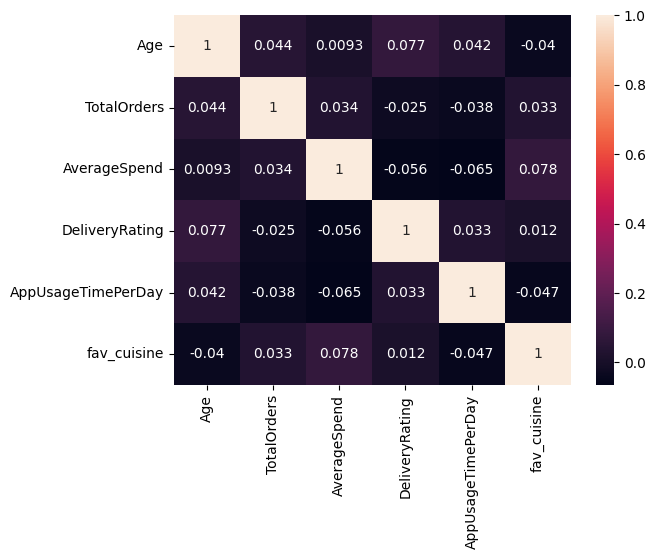

In [ ]:
#correlation matrix
#it shows dependency between the features
corr=data.corr()

#Heatmap for visulization
sns.heatmap(corr, annot=True)

In correlation, it is visible that the 'DeliveryRating' is highly correlated with 'TimeSpent' and 'Age' features, which indicates that older customers who spend more time on the platform tend to give lower delivery ratings.

The 'fav_cuisine' feature is less correlated with 'DeliveryRating' or 'Age', which suggests that the type of cuisine a customer prefers does not significantly influence their delivery rating or time spent on the platform.

The 'AverageSpend' is highly dependent on 'fav_cuisine'.

In [147]:
X=data
X

,Age,TotalOrders,AverageSpend,DeliveryRating,AppUsageTimePerDay,fav_cuisine
0,56,37,312.70,4.6,20.9,3
1,46,34,193.97,3.0,150.2,3
2,32,22,291.66,4.1,59.7,3
3,25,30,232.21,3.7,85.5,4
4,38,27,244.84,4.7,13.7,2
...,...,...,...,...,...,...
495,56,30,398.62,4.3,150.7,4
496,49,27,423.00,3.6,39.0,0
497,41,31,355.66,3.6,15.2,4
498,40,29,305.66,4.1,44.8,4


In [ ]:
#import preprocessing requirement for scalling
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_scaled=sc.fit_transform(X) #Scale values
X_scaled

array([[ 1.36804678,  1.26901826,  0.08191151,  1.14983409, -1.49957516,
         0.66822722],
       [ 0.54757972,  0.74650182, -1.50841474, -1.03876279,  1.17058941,
         0.66822722],
       [-0.60107417, -1.34356394, -0.19990828,  0.46589756, -0.69831928,
         0.66822722],
       ...,
       [ 0.13734619,  0.22398538,  0.65733825, -0.21803896, -1.61728544,
         1.38367392],
       [ 0.05529948, -0.12435891, -0.0123856 ,  0.46589756, -1.00601806,
         1.38367392],
       [ 0.79371984, -0.99521964, -1.69754476,  1.4234087 , -0.5289817 ,
         0.66822722]])

**Dimensionality Reduction with PCA**
<h3> Principle Component Analysis</h3>

In [ ]:
#import Unsupervised Learning libraries
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Applying PCA to reduce the data to 2 dimensions for easier visualization and analysis

pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_scaled)

PCA is a dimensionality reduction technique that transforms the data into a new coordinate system, reducing the number of features while retaining most of the variance in the data. This helps in visualizing high-dimensional data and can improve the performance of clustering algorithms by eliminating noise and redundant features.

In [ ]:
#K means clustering
#K-means partitions the dataset into K distinct clusters
#by minimizing the variance within each cluster, It is widely used for clustering tasks in various domains

kmeans = KMeans(n_clusters =3)  # no. of clusters = 3
kmeans_labels = kmeans.fit_predict(X_scaled)    #Fit the model and predict the cluster labels

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#Transforming the cluster centroids to the PCA space for visualization
centriod_pca = pca.transform(kmeans.cluster_centers_)

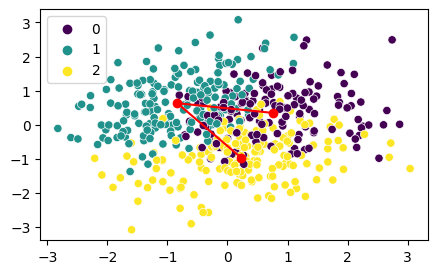

In [ ]:
# Visualizing the clusters in the PCA space
# Plotting the clusters and centroids

plt.figure(figsize=(5,3))
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1],hue = kmeans_labels,palette="viridis")
plt.plot(centriod_pca[:,0],centriod_pca[:,1],color='red',marker='o')
plt.show()

The scatter plot visualizes the clusters formed by KMeans in the reduced 2D PCA space. Each color represents a different cluster, and the red markers indicate the cluster centroids.


- The data points are grouped into three distinct clusters, suggesting the presence of three customer segments based on the features analyzed.
- The separation between clusters indicates that the clustering algorithm has successfully identified groups with similar characteristics.
- The centroids' positions help understand the central tendency of each cluster in the PCA space.


In [ ]:
# Apply DBSCAN for clustering
# DBSCAN (Density-Based Spatial Clustering of Applications with Noise) 
# is an unsupervised clustering algorithm that groups together points 
# that are closely packed and marks points that lie alone in low-density regions as outliers.

db=DBSCAN(eps=1.5, min_samples=5)
db_samples=db.fit_predict(X_scaled)



**Key Parameters:**
- `eps`: The maximum distance between two samples for them to be considered as in the same neighborhood. A smaller `eps` value means that only points that are very close together will be grouped.
- `min_samples`: The minimum number of points required to form a dense region (i.e., a cluster). If a point has at least `min_samples` points within `eps` distance, it is considered a core point.

DBSCAN is effective at finding clusters of arbitrary shape and identifying outliers, making it useful for datasets where clusters are not well separated or have irregular shapes.

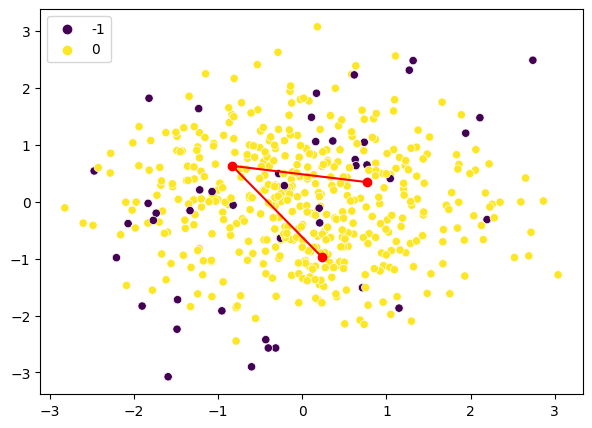

In [ ]:
#visulize DBSCAN clusters
# Plotting the clusters and centroids
plt.figure(figsize=(7,5))
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1],hue = db_samples,palette="viridis")
plt.plot(centriod_pca[:,0],centriod_pca[:,1],color='red',marker='o')
plt.show()

The DBSCAN cluster visualization in the PCA-reduced space shows how the algorithm groups data points based on density:


- DBSCAN successfully identifies dense regions in the data, which may not align with the clusters found by KMeans.
- The presence of noise points suggests that some customers do not fit well into any cluster, possibly representing unique or atypical behaviors.
- This clustering approach is useful for detecting outliers and understanding the natural grouping of customers without assuming a fixed number of clusters.

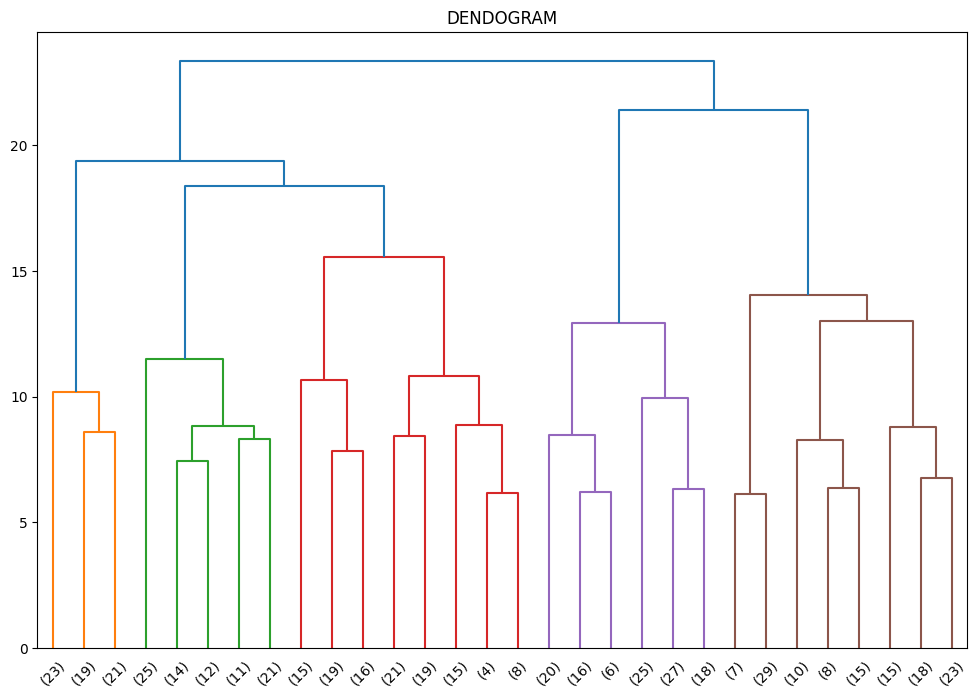

In [ ]:
#import required libraries for Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, dendrogram

plt.figure(figsize=(12,8))
link = linkage(X_scaled,method='ward') #linkage function computes the distance between clusters
# 'ward' minimizes the variance of clusters being merged

dendrogram(link,p=30,truncate_mode='lastp') #dendrogram visualizes the hierarchical clustering as a tree structure
# 'p' specifies the number of clusters to display
plt.title("DENDOGRAM")
plt.show()

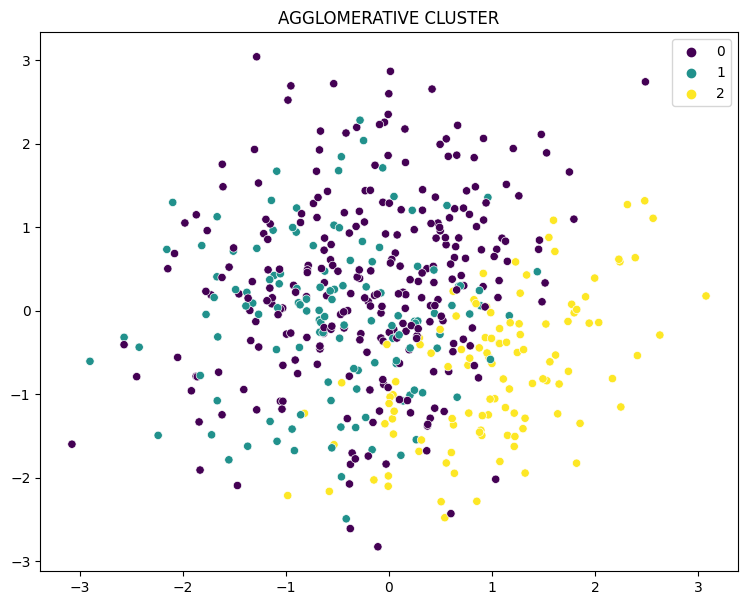

In [168]:


agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled)
plt.figure(figsize=(9,7))
sns.scatterplot(x=x_pca[:,1],y=x_pca[:,0],hue=agglo_labels,palette="viridis")
plt.title("AGGLOMERATIVE CLUSTER")
plt.show()